In [85]:
from src.parsers.j30 import load_j30
from src.parsers.patterson import load_patterson

from src.solvers.rcpsp import solve_rcpsp, validate_rcpsp

from src.visu.visualize_rcpsp import visualize

from docplex.cp.model import CpoModel
import docplex.cp.utils_visu as visu

import os

In [86]:
# the patterson format
parsed_input = {}

with open("data/rcpsp/j30opt.sm") as file:
    # 1. line: blank line
    for i in range(22):
        file.readline() 


    results  = {}

    line = file.readline()
    print(line)
    while not line.startswith("====="):
        contents = [number.strip() for number in line.split(" ") if len(number.strip()) > 0]
        parameter = int(contents[0])
        instance = int(contents[1])
        makespan = int(contents[2])
        cpu_time = float(contents[3])

        instance_name = f"j30{parameter}_{instance}"

        results[instance_name] = {"parameter": parameter, "instance": instance, "makespan": makespan, "cpu_time": cpu_time}

        line = file.readline()
        print(line)

1       1         43       0.30

1       2         47       0.11

1       3         47       0.12

1       4         62       0.64

1       5         39       0.48

1       6         48       0.04

1       7         60       0.01

1       8         53       0.03

1       9         49       0.10

1       10        45       0.04

2       1         38       0.02

2       2         51       0.02

2       3         43       0.01

2       4         43       0.02

2       5         51       0.02

2       6         47       0.01

2       7         47       0.01

2       8         54       0.03

2       9         54       0.03

2       10        43       0.04

3       1         72       0.01

3       2         40       0.03

3       3         57       0.02

3       4         98       0.01

3       5         53       0.05

3       6         54       0.01

3       7         48       0.02

3       8         54       0.01

3       9         65       0.04

3       10        59       0.02

4       1 

In [3]:
results

{'j301_1': {'parameter': 1, 'instance': 1, 'makespan': 43, 'cpu_time': 0.3},
 'j301_2': {'parameter': 1, 'instance': 2, 'makespan': 47, 'cpu_time': 0.11},
 'j301_3': {'parameter': 1, 'instance': 3, 'makespan': 47, 'cpu_time': 0.12},
 'j301_4': {'parameter': 1, 'instance': 4, 'makespan': 62, 'cpu_time': 0.64},
 'j301_5': {'parameter': 1, 'instance': 5, 'makespan': 39, 'cpu_time': 0.48},
 'j301_6': {'parameter': 1, 'instance': 6, 'makespan': 48, 'cpu_time': 0.04},
 'j301_7': {'parameter': 1, 'instance': 7, 'makespan': 60, 'cpu_time': 0.01},
 'j301_8': {'parameter': 1, 'instance': 8, 'makespan': 53, 'cpu_time': 0.03},
 'j301_9': {'parameter': 1, 'instance': 9, 'makespan': 49, 'cpu_time': 0.1},
 'j301_10': {'parameter': 1, 'instance': 10, 'makespan': 45, 'cpu_time': 0.04},
 'j302_1': {'parameter': 2, 'instance': 1, 'makespan': 38, 'cpu_time': 0.02},
 'j302_2': {'parameter': 2, 'instance': 2, 'makespan': 51, 'cpu_time': 0.02},
 'j302_3': {'parameter': 2, 'instance': 3, 'makespan': 43, 'cpu_

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:66): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_71 = pulse("4", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:189): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                     VarCumulAtom

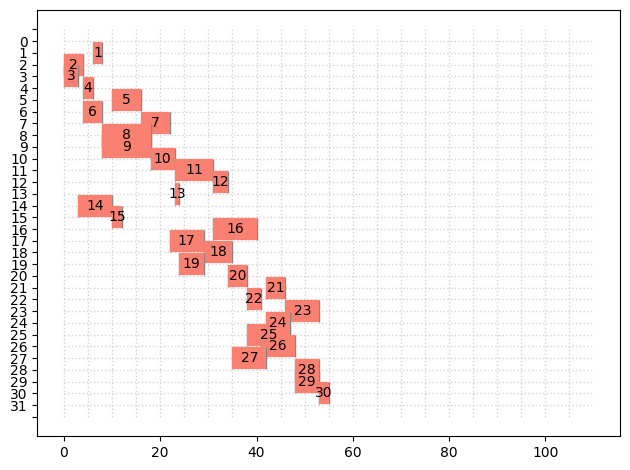

IntervalVarValue(start=0, end=0, size=0)


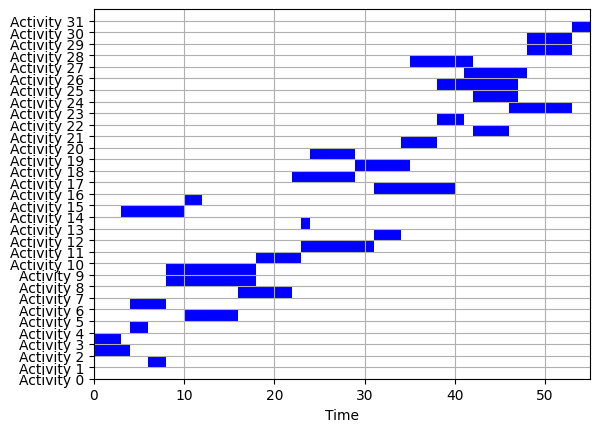

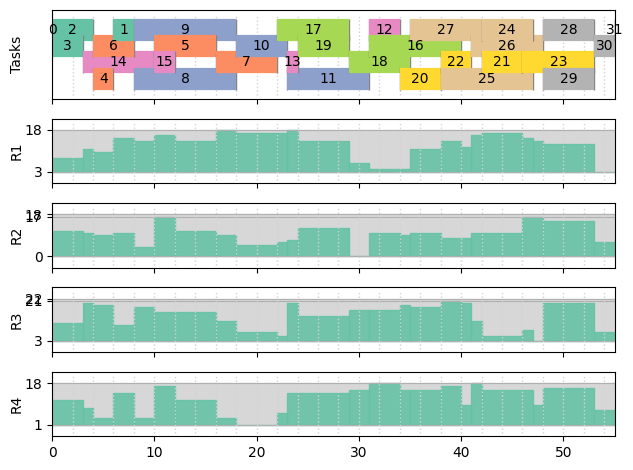

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:21): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_68 = pulse("1", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:51): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_7

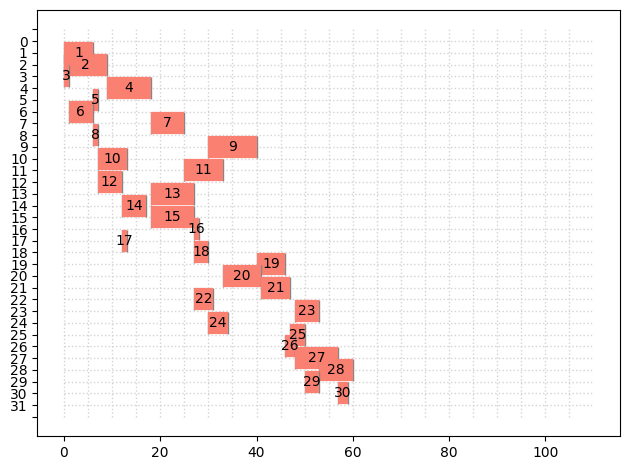

IntervalVarValue(start=0, end=0, size=0)


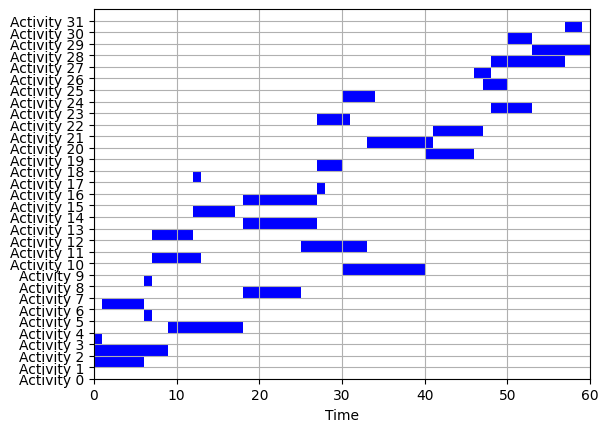

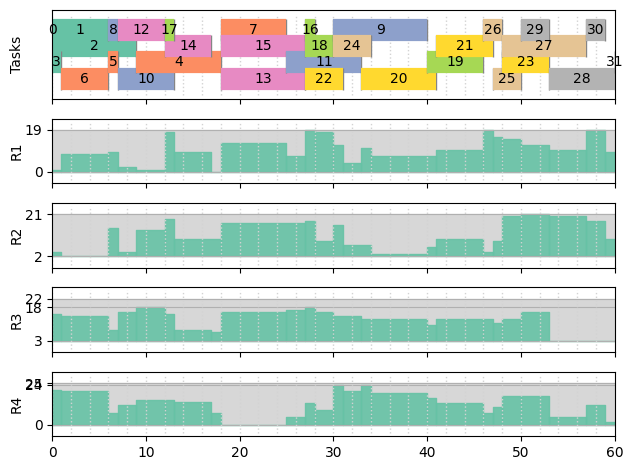

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:36): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_69 = pulse("2", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:66): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_7

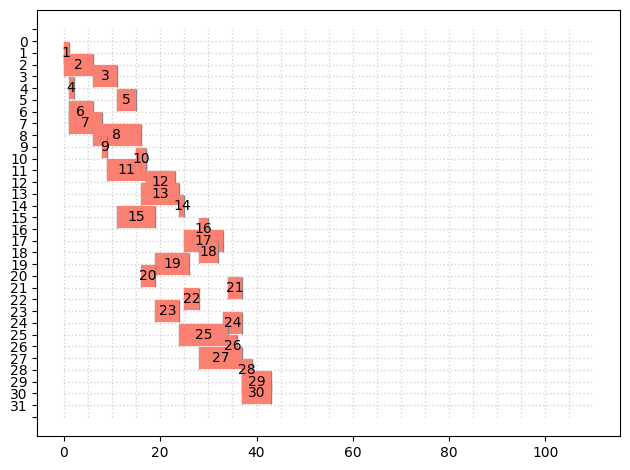

IntervalVarValue(start=0, end=0, size=0)


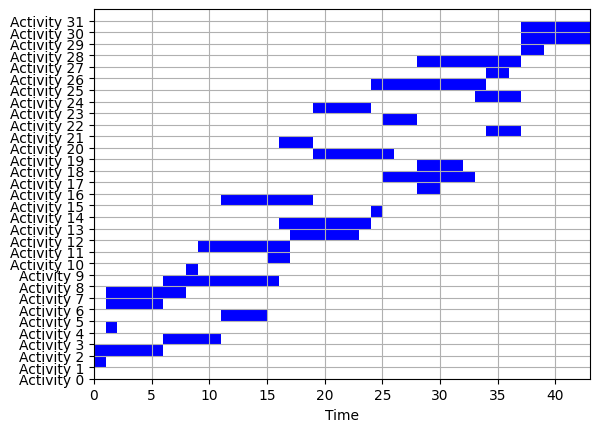

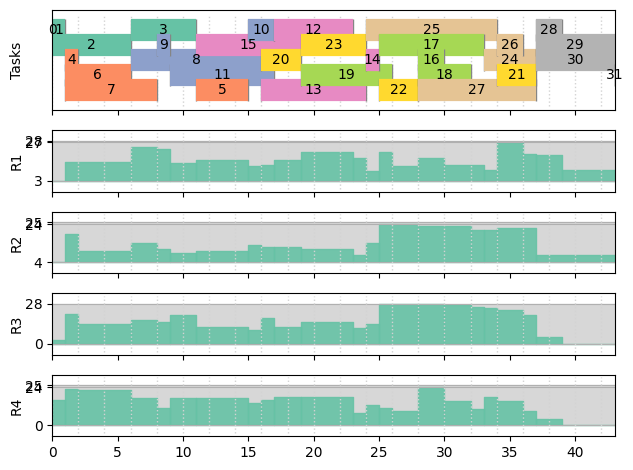

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:82): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_72 = pulse("5", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:189): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                     VarCumulAtom

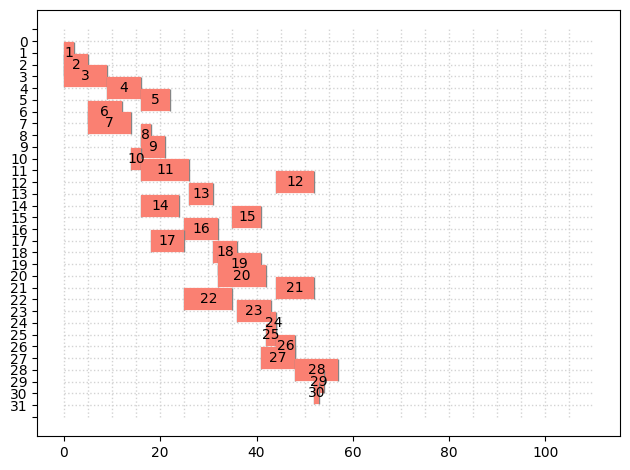

IntervalVarValue(start=0, end=0, size=0)


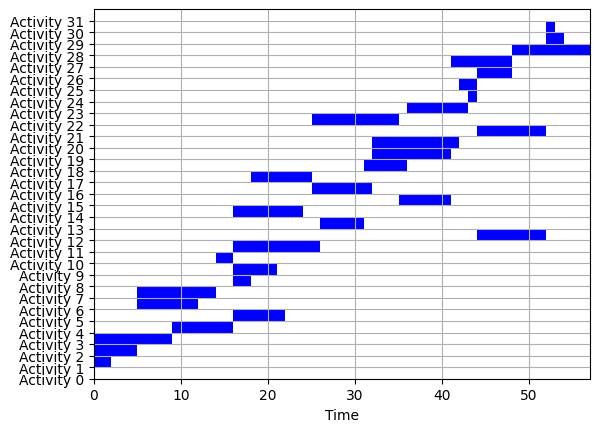

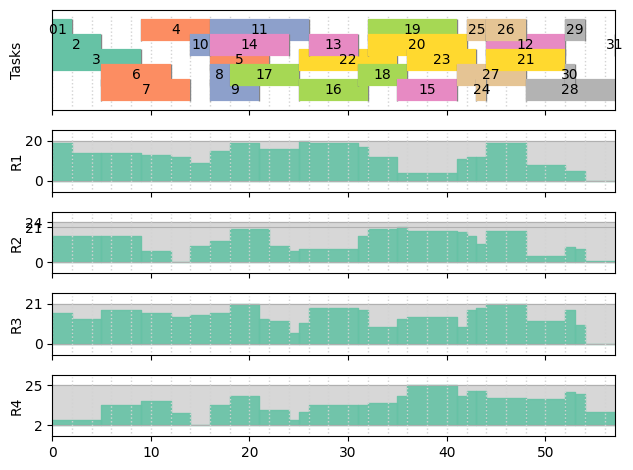

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:36): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_69 = pulse("2", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:157): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                     VarCumulAtom

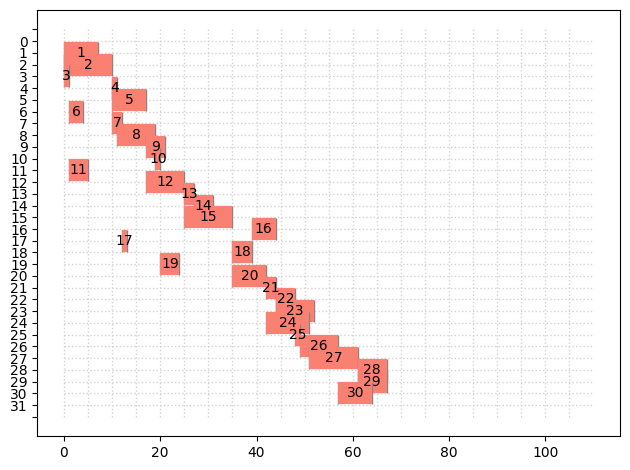

IntervalVarValue(start=0, end=0, size=0)


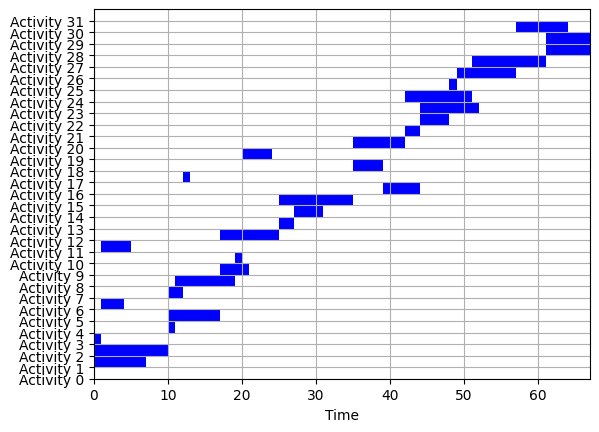

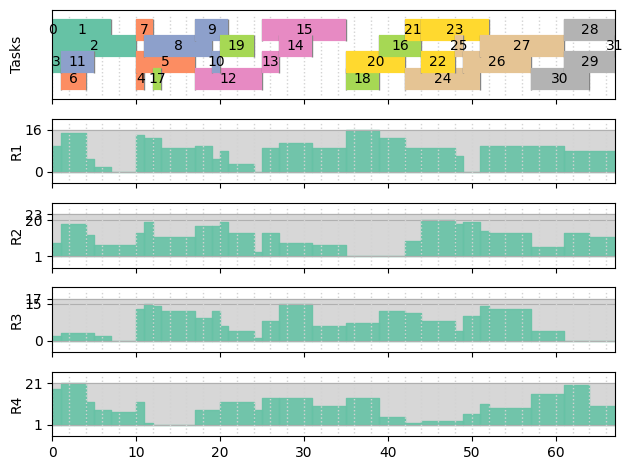

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:21): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_68 = pulse("1", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:51): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_7

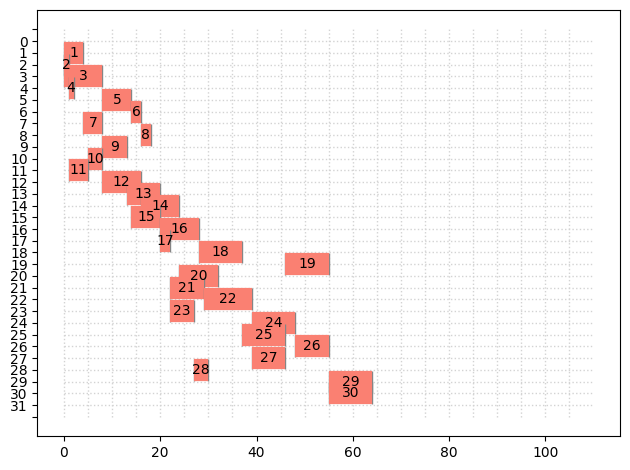

IntervalVarValue(start=0, end=0, size=0)


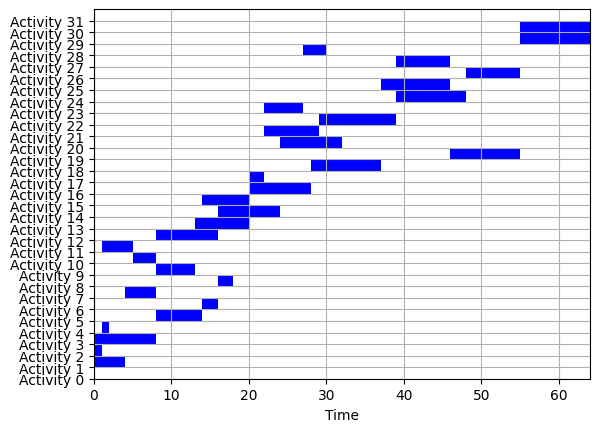

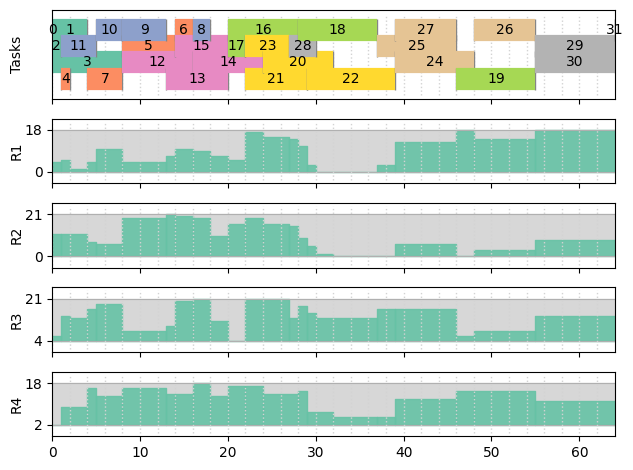

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:81): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_72 = pulse("5", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:111): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                     VarCumulAtom

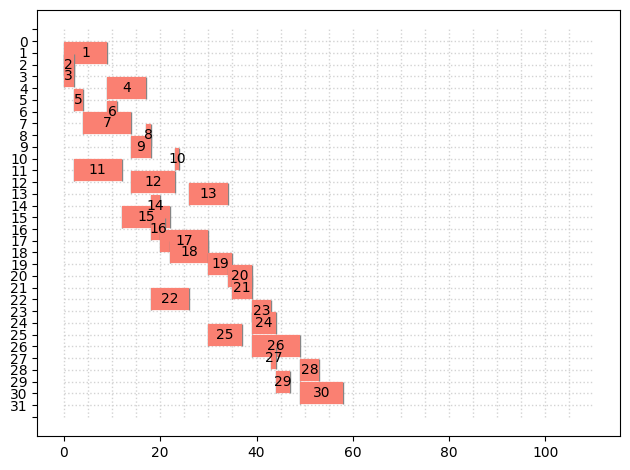

IntervalVarValue(start=0, end=0, size=0)


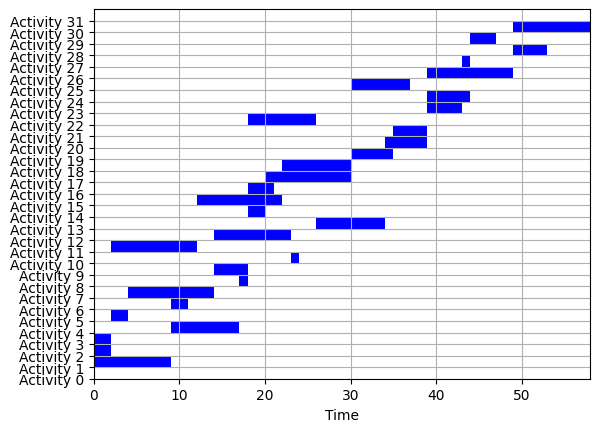

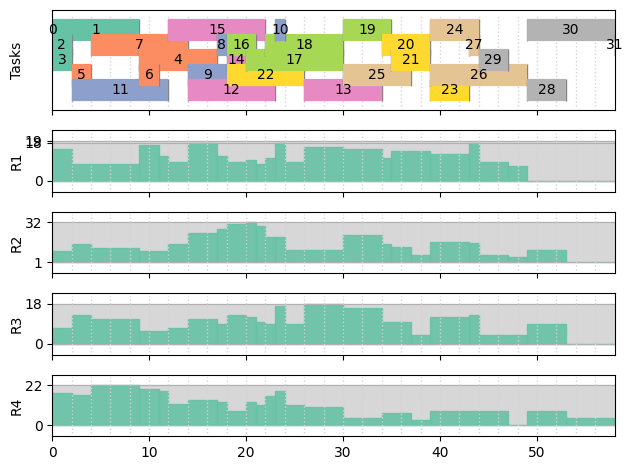

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:36): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_69 = pulse("2", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:66): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_7

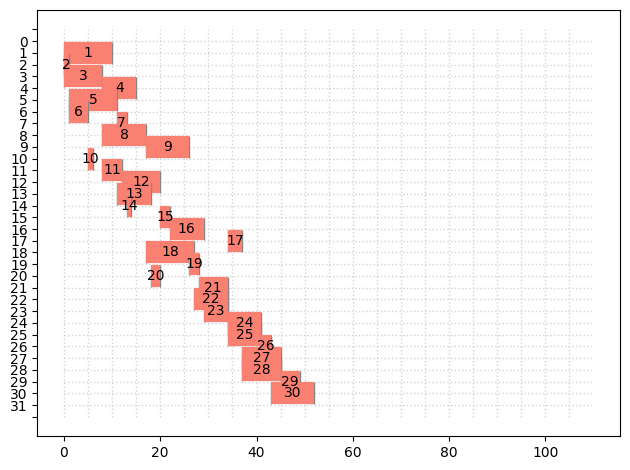

IntervalVarValue(start=0, end=0, size=0)


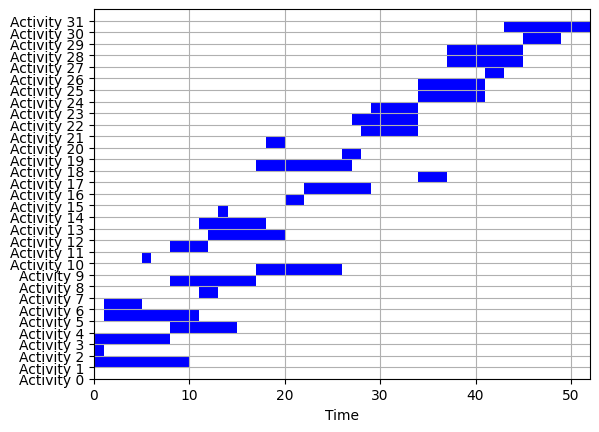

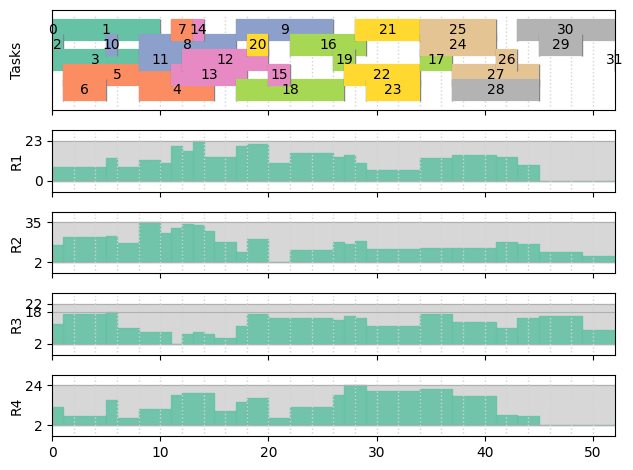

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:97): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_73 = pulse("6", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:127): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                     VarCumulAtom

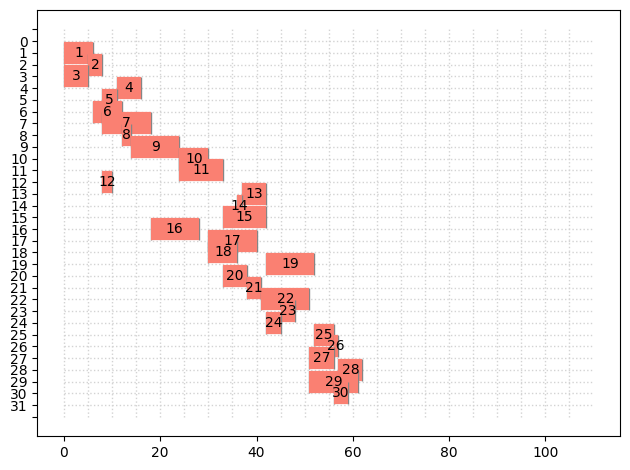

IntervalVarValue(start=0, end=0, size=0)


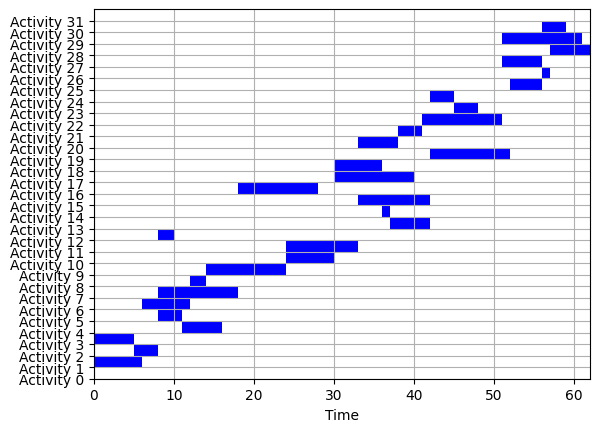

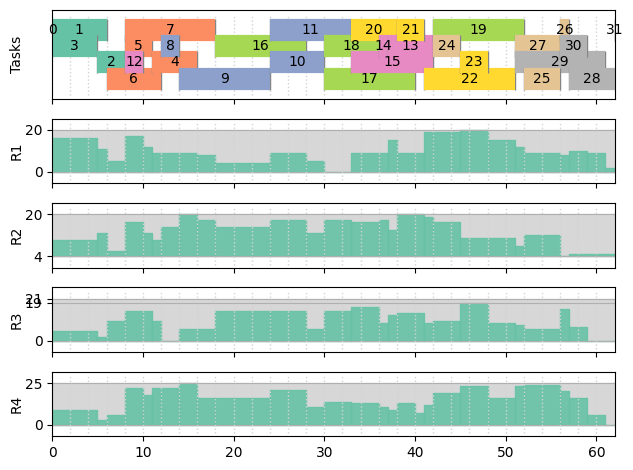

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:36): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_69 = pulse("2", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:51): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_7

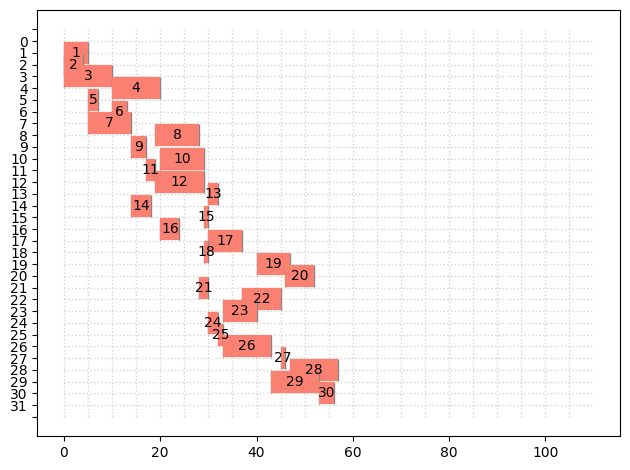

IntervalVarValue(start=0, end=0, size=0)


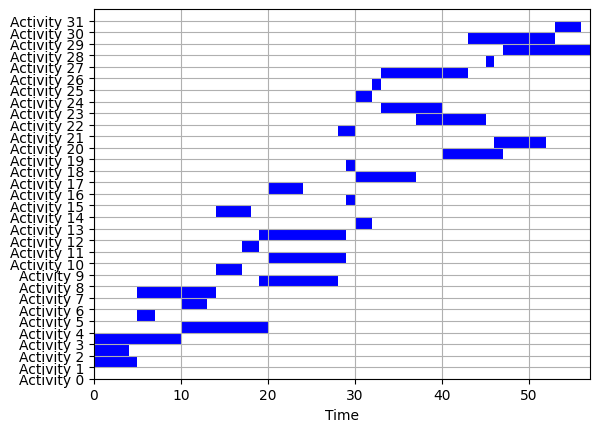

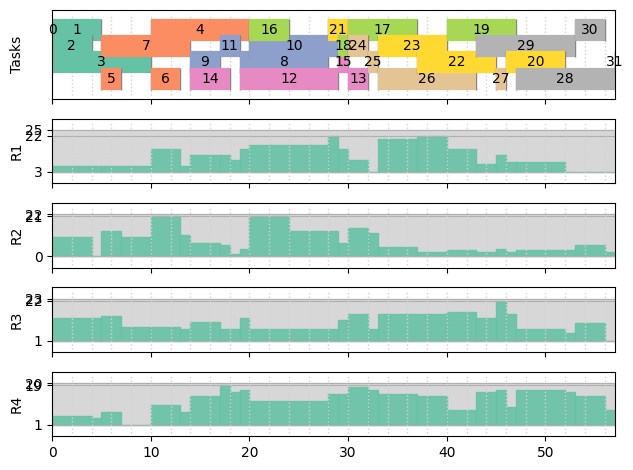

In [87]:
for filename in os.listdir("data/rcpsp/j30.sm"):
    if filename.startswith("j3043"):
        parsed_input = load_j30("data/rcpsp/j30.sm/" + filename)

        no_jobs = parsed_input["number_of_jobs"]  # number of activities
        no_resources = parsed_input["resources"]["renewable_resources"]["number_of_resources"]
        durations = [job["duration"] for job in parsed_input["job_specifications"]]  # duration of each activity
        successors = [job["successors"] for job in parsed_input["job_specifications"]] # # precedence constraints
        capacities = parsed_input["resources"]["renewable_resources"]["renewable_availabilities"]  # available resource capacity
        requests = [[parsed_input["job_specifications"][i]["request_duration"][f"R{k+1}"] for i in range(no_jobs)] for k in range(no_resources) ]

        sol, x = solve_rcpsp(no_jobs, no_resources, durations, successors, capacities, requests, validate=True)

        instance_name = filename.split(".")[0]

        print("Correct result: ", results[instance_name]["makespan"])
        print("Time spent on reference:", results[instance_name]["cpu_time"])
        print("Time spent on our solution:", sol.get_solve_time())

        visualize(sol, x, no_resources, requests, capacities)

        assert(results[instance_name]["makespan"] == sol.get_objective_value())


In [5]:
parsed_input = load_j30("data/rcpsp/j30.sm/j3043_5.sm")


In [6]:
parsed_input = load_patterson("data/rcpsp/RG30_Set 1/Pat479.rcp")


[0, 0, 0, 0, 0, 4, 2, 4, 15, 31]
[8, 1, 0, 1, 1, 3, 30, 20, 3]
[10, 0, 1, 2, 4, 4, 29, 12, 11, 5]
[2, 1, 1, 4, 0, 2, 29, 6]
[7, 3, 0, 3, 4, 1, 6]
[10, 7, 0, 8, 2, 2, 28, 7]
[10, 0, 3, 5, 9, 2, 27, 8]
[1, 2, 0, 3, 8, 3, 26, 19, 9]
[3, 0, 2, 3, 4, 1, 10]
[5, 0, 2, 6, 2, 2, 25, 13]
[2, 5, 4, 0, 3, 3, 25, 19, 14]
[6, 0, 5, 5, 4, 1, 13]
[8, 5, 0, 2, 7, 2, 24, 14]
[6, 5, 0, 6, 2, 2, 22, 16]
[6, 0, 7, 5, 4, 2, 26, 16]
[4, 3, 3, 0, 7, 1, 17]
[4, 6, 0, 5, 3, 1, 18]
[7, 4, 0, 7, 2, 1, 21]
[2, 5, 8, 2, 0, 1, 21]
[1, 3, 2, 0, 3, 1, 21]
[8, 4, 3, 3, 0, 1, 23]
[2, 5, 1, 0, 4, 1, 23]
[9, 6, 0, 6, 3, 1, 32]
[2, 6, 0, 1, 4, 1, 32]
[8, 5, 0, 3, 4, 1, 32]
[1, 3, 6, 0, 2, 1, 32]
[1, 4, 0, 3, 6, 1, 32]
[6, 0, 4, 3, 4, 1, 32]
[1, 1, 5, 0, 3, 1, 32]
[6, 0, 9, 5, 4, 1, 32]
[8, 0, 6, 5, 5, 1, 32]


In [7]:
parsed_input

{'number_of_jobs': 32,
 'resources': {'renewable_resources': {'number_of_resources': 4,
   'renewable_availabilities': [10, 10, 10, 10]}},
 'job_specifications': [{'job_nr': 0,
   'duration': 0,
   'request_duration': {'R1': 0, 'R2': 0, 'R3': 0, 'R4': 0},
   'number_of_successors': 4,
   'successors': [2, 4, 15, 31]},
  {'job_nr': 0,
   'duration': 8,
   'request_duration': {'R1': 1, 'R2': 0, 'R3': 1, 'R4': 1},
   'number_of_successors': 3,
   'successors': [30, 20, 3]},
  {'job_nr': 0,
   'duration': 10,
   'request_duration': {'R1': 0, 'R2': 1, 'R3': 2, 'R4': 4},
   'number_of_successors': 4,
   'successors': [29, 12, 11, 5]},
  {'job_nr': 0,
   'duration': 2,
   'request_duration': {'R1': 1, 'R2': 1, 'R3': 4, 'R4': 0},
   'number_of_successors': 2,
   'successors': [29, 6]},
  {'job_nr': 0,
   'duration': 7,
   'request_duration': {'R1': 3, 'R2': 0, 'R3': 3, 'R4': 4},
   'number_of_successors': 1,
   'successors': [6]},
  {'job_nr': 0,
   'duration': 10,
   'request_duration': {'R1'

In [8]:
no_jobs = parsed_input["number_of_jobs"]  # number of activities
no_resources = parsed_input["resources"]["renewable_resources"]["number_of_resources"]
durations = [job["duration"] for job in parsed_input["job_specifications"]]  # duration of each activity
successors = [job["successors"] for job in parsed_input["job_specifications"]] # # precedence constraints
capacities = parsed_input["resources"]["renewable_resources"]["renewable_availabilities"]  # available resource capacity
requests = [[parsed_input["job_specifications"][i]["request_duration"][f"R{k+1}"] for i in range(no_jobs)] for k in range(no_resources) ]

In [9]:
print("no jobs", no_jobs)
print("no resources", no_resources)
print("durations", durations)
print("successors", successors)
print("capacities", capacities)
print("requests", requests)

no jobs 32
no resources 4
durations [0, 8, 10, 2, 7, 10, 10, 1, 3, 5, 2, 6, 8, 6, 6, 4, 4, 7, 2, 1, 8, 2, 9, 2, 8, 1, 1, 6, 1, 6, 8, 0]
successors [[2, 4, 15, 31], [30, 20, 3], [29, 12, 11, 5], [29, 6], [6], [28, 7], [27, 8], [26, 19, 9], [10], [25, 13], [25, 19, 14], [13], [24, 14], [22, 16], [26, 16], [17], [18], [21], [21], [21], [23], [23], [32], [32], [32], [32], [32], [32], [32], [32], [32], []]
capacities [10, 10, 10, 10]
requests [[0, 1, 0, 1, 3, 7, 0, 2, 0, 0, 5, 0, 5, 5, 0, 3, 6, 4, 5, 3, 4, 5, 6, 6, 5, 3, 4, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, 3, 0, 2, 2, 4, 5, 0, 0, 7, 3, 0, 0, 8, 2, 3, 1, 0, 0, 0, 6, 0, 4, 5, 9, 6, 0], [0, 1, 2, 4, 3, 8, 5, 3, 3, 6, 0, 5, 2, 6, 5, 0, 5, 7, 2, 0, 3, 0, 6, 1, 3, 0, 3, 3, 0, 5, 5, 0], [0, 1, 4, 0, 4, 2, 9, 8, 4, 2, 3, 4, 7, 2, 4, 7, 3, 2, 0, 3, 0, 4, 3, 4, 4, 2, 6, 4, 3, 4, 5, 0]]


In [10]:
sol, x = solve_rcpsp(no_jobs, no_resources, durations, successors, capacities, requests)

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_67 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:36): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_69 = pulse("2", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:13(stream:47:96): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_7

In [11]:
sol.print_solution()

-------------------------------------------------------------------------------
Model constraints: 54, variables: integer: 0, interval: 32, sequence: 0
Solve status: Optimal
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.04 sec
-------------------------------------------------------------------------------
Objective values: (101,), bounds: (101,), gaps: (0,)
Variables:
   0 = IntervalVarValue(start=0, end=0, size=0)
   1 = IntervalVarValue(start=0, end=8, size=8)
   2 = IntervalVarValue(start=8, end=18, size=10)
   3 = IntervalVarValue(start=0, end=2, size=2)
   4 = IntervalVarValue(start=18, end=25, size=7)
   5 = IntervalVarValue(start=25, end=35, size=10)
   6 = IntervalVarValue(start=35, end=45, size=10)
   7 = IntervalVarValue(start=45, end=46, size=1)
   8 = IntervalVarValue(start=46, end=49, size=3)
   9 = IntervalVarValue(start=49, end=54, size=5)
   10 = IntervalVarValue(start=46, end=48, size=2)
   11 = IntervalVarValue(start=19, end=25, siz

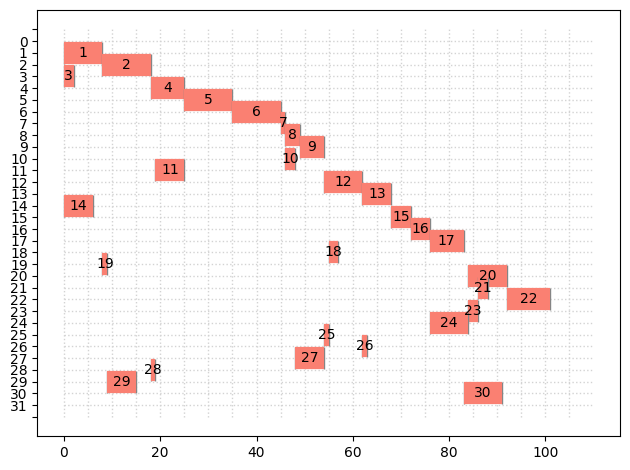

IntervalVarValue(start=0, end=0, size=0)


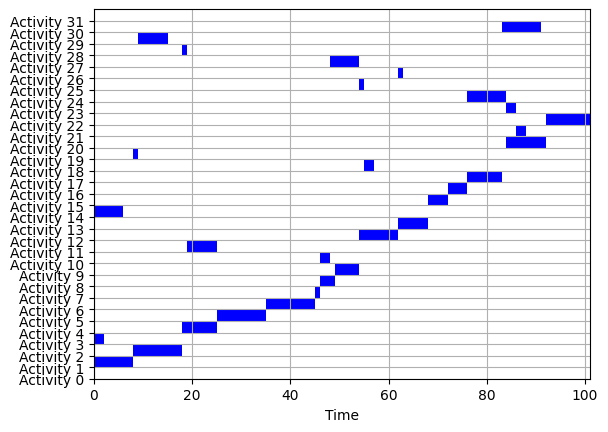

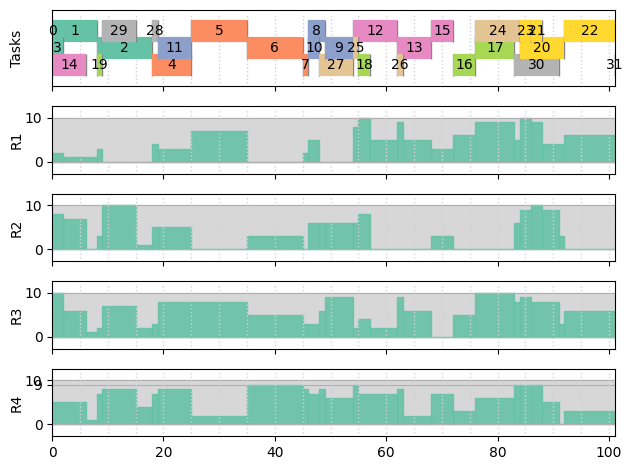

In [12]:
visualize(sol, x, no_resources, requests, capacities)

In [13]:
# 
# from pylab import rcParams
# rcParams['figure.figsize'] = 25, 5# Draw solution
# if sol and visu.is_visu_enabled():
#     visu.timeline('Solution SchedOptional', 0, 100)
#     for m, machine in df_machines.iterrows():
#         visu.sequence(name=m)
#         for t in machine_operations[m]:
#             wt = sol.get_var_solution(t)
#             visu.interval(wt, "salmon", t.get_name())
#     visu.show()

In [1]:
from src.parsers.c15 import load_c15

In [2]:
parsed_input = load_c15("data/mm-rcpsp/c15.mm/c158_3.mm")


1 1
[0, 0, 0, 0]
1 3
[8, 5, 7, 0]
2 3
[7, 5, 7, 0]
3 3
[4, 2, 5, 0]
1 3
[9, 7, 4, 0]
2 3
[9, 6, 0, 7]
3 3
[2, 5, 0, 7]
1 3
[8, 7, 6, 0]
2 3
[6, 6, 6, 0]
3 3
[5, 5, 6, 0]
1 3
[4, 4, 3, 0]
2 3
[4, 3, 0, 9]
3 3
[1, 3, 0, 7]
1 3
[6, 8, 0, 7]
2 3
[5, 7, 0, 4]
3 3
[4, 7, 0, 3]
1 3
[7, 7, 6, 0]
2 3
[5, 6, 0, 2]
3 3
[2, 4, 0, 2]
1 3
[8, 5, 0, 6]
2 3
[8, 4, 8, 0]
3 3
[5, 2, 1, 0]
1 3
[3, 7, 4, 0]
2 3
[2, 5, 3, 0]
3 3
[2, 4, 0, 9]
1 3
[5, 4, 0, 7]
2 3
[4, 3, 0, 7]
3 3
[4, 3, 0, 4]
1 3
[2, 5, 0, 7]
2 3
[2, 5, 5, 0]
3 3
[1, 5, 0, 5]
1 3
[10, 6, 0, 4]
2 3
[10, 6, 10, 0]
3 3
[7, 5, 9, 0]
1 3
[9, 10, 0, 2]
2 3
[10, 9, 10, 0]
3 3
[8, 8, 7, 0]
1 3
[6, 5, 0, 5]
2 3
[5, 4, 0, 2]
3 3
[4, 4, 3, 0]
1 3
[5, 6, 3, 0]
2 3
[4, 4, 0, 10]
3 3
[4, 3, 0, 10]
1 3
[8, 9, 0, 5]
2 3
[5, 9, 4, 0]
3 3
[4, 9, 3, 0]
1 3
[6, 3, 0, 3]
2 3
[5, 3, 0, 2]
3 3
[5, 1, 4, 0]
1 1
[0, 0, 0, 0]


In [3]:
parsed_input

{'no_projects': 1,
 'number_of_jobs': 18,
 'horizon': 125,
 'resources': {'renewable_resources': {'number_of_resources': 2,
   'renewable_availabilities': [34, 31]},
  'non_renewable_resources': {'number_of_resources': 2,
   'non_renewable_availabilities': [28, 26]},
  'doubly_constrained_resources': {'number_of_resources': 0}},
 'project_information': {'pronr': 1,
  'no_jobs': 16,
  'rel_date': 0,
  'duedate': 20,
  'tardcost': 2,
  'mpm_time': 20},
 'job_specifications': [{'job_nr': 1,
   'no_modes': 1,
   'modes': [{'mode': 1,
     'duration': 0,
     'request_duration': {'R1': 0, 'R2': 0, 'N1': 0, 'N2': 0}}],
   'no_successors': 3,
   'successors': [2, 3, 4]},
  {'job_nr': 2,
   'no_modes': 3,
   'modes': [{'mode': 1,
     'duration': 2,
     'request_duration': {'R1': 8, 'R2': 5, 'N1': 7, 'N2': 0}},
    {'mode': 2,
     'duration': 5,
     'request_duration': {'R1': 7, 'R2': 5, 'N1': 7, 'N2': 0}},
    {'mode': 3,
     'duration': 9,
     'request_duration': {'R1': 4, 'R2': 2, 'N1'

In [4]:
no_jobs = parsed_input["number_of_jobs"]  # number of activities
no_resources = parsed_input["resources"]["renewable_resources"]["number_of_resources"] + parsed_input["resources"]["non_renewable_resources"]["number_of_resources"]  # number of resources

no_modes_list = [job_specification['no_modes'] for job_specification in parsed_input['job_specifications']]

durations = [[mode["duration"] for mode in job["modes"]] for job in parsed_input["job_specifications"] ]  # duration of each activity
successors = [job["successors"] for job in parsed_input["job_specifications"]] # # precedence constraints
renewable_capacities = parsed_input["resources"]["renewable_resources"]["renewable_availabilities"]  # available resource capacity
no_renewable_resources= parsed_input["resources"]["renewable_resources"]["number_of_resources"]  # number of renewable resources
non_renewable_capacities = parsed_input["resources"]["non_renewable_resources"]["non_renewable_availabilities"]  # available resource capacity
no_non_renewable_resources = parsed_input["resources"]["non_renewable_resources"]["number_of_resources"]  # number of non-renewable resources

resource_keys = ["R1", "R2", "N1", "N2"]
requests = [[[mode["request_duration"][k] for mode in job["modes"]] for job in parsed_input["job_specifications"]  ] for k in resource_keys]

# [resource_request for resource_request in mode["request_duration"].values()]

In [5]:
print("no_jobs", no_jobs)
print("no_resources", no_resources)
print("no_modes_list", no_modes_list)
print("durations", durations)
print("successors", successors)
print("renewable_capacities", renewable_capacities)
print("non_renewable_capacities", non_renewable_capacities)
print("requests", requests)

no_jobs 18
no_resources 4
no_modes_list [1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
durations [[0], [2, 5, 9], [3, 3, 6], [1, 5, 7], [4, 5, 8], [6, 7, 10], [7, 7, 10], [3, 3, 6], [3, 4, 10], [1, 3, 7], [1, 3, 9], [1, 1, 4], [6, 6, 8], [6, 7, 7], [2, 2, 9], [1, 2, 8], [3, 4, 7], [0]]
successors [[2, 3, 4], [14], [16], [5, 6, 7], [13], [8, 10, 14], [9, 11, 17], [12], [16], [12, 15], [15], [13], [17], [16, 17], [18], [18], [18], []]
renewable_capacities [34, 31]
non_renewable_capacities [28, 26]
requests [[[0], [8, 7, 4], [9, 9, 2], [8, 6, 5], [4, 4, 1], [6, 5, 4], [7, 5, 2], [8, 8, 5], [3, 2, 2], [5, 4, 4], [2, 2, 1], [10, 10, 7], [9, 10, 8], [6, 5, 4], [5, 4, 4], [8, 5, 4], [6, 5, 5], [0]], [[0], [5, 5, 2], [7, 6, 5], [7, 6, 5], [4, 3, 3], [8, 7, 7], [7, 6, 4], [5, 4, 2], [7, 5, 4], [4, 3, 3], [5, 5, 5], [6, 6, 5], [10, 9, 8], [5, 4, 4], [6, 4, 3], [9, 9, 9], [3, 3, 1], [0]], [[0], [7, 7, 5], [4, 0, 0], [6, 6, 6], [3, 0, 0], [0, 0, 0], [6, 0, 0], [0, 8, 1], [4, 3, 0], [0, 0, 

In [6]:
from src.solvers.mmrcpsp import solve_mmrcpsp

In [7]:
sol, xs = solve_mmrcpsp(no_jobs, no_modes_list, no_renewable_resources, no_non_renewable_resources, durations, successors, renewable_capacities, non_renewable_capacities, requests)

c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:25(stream:103:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                      VarCumulAtom_125 = pulse(task_0_mode_0, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:25(stream:103:1255): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                         VarCumulAtom_174 = pulse(task_17_mode_0, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:25(stream:104:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                         

In [8]:
[x.name for x in xs]


['task_0_mode_0',
 'task_1_mode_2',
 'task_2_mode_0',
 'task_3_mode_0',
 'task_4_mode_0',
 'task_5_mode_1',
 'task_6_mode_2',
 'task_7_mode_2',
 'task_8_mode_1',
 'task_9_mode_2',
 'task_10_mode_2',
 'task_11_mode_0',
 'task_12_mode_0',
 'task_13_mode_1',
 'task_14_mode_0',
 'task_15_mode_2',
 'task_16_mode_0',
 'task_17_mode_0']

In [9]:
from src.visu.visualize_mmrcpsp import visualize

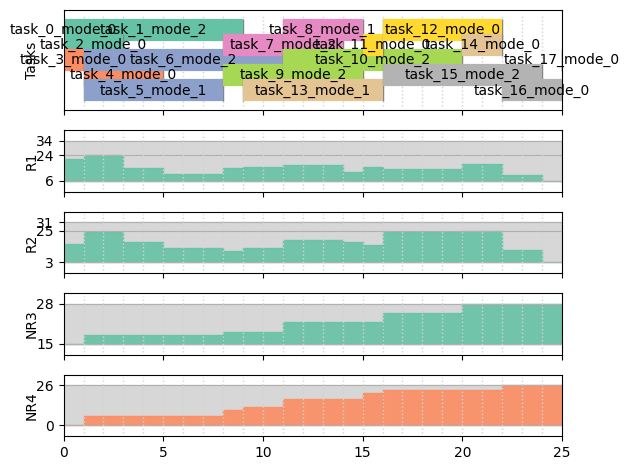

In [10]:
visualize(sol, xs, no_renewable_resources, no_non_renewable_resources, requests, renewable_capacities, non_renewable_capacities)

In [12]:
del visualize